# Context

The goal of this analysis is to create a model to accurate predict if a customer is too risky to approve for a credit card. As well as developing a model, we will explore what features are most important when deciding whethe to extend a line of credit or not

# Data Definition

This data contains 20 different features. Below are the ones that have descriptions
* checking_status: Status of existing checking account
* duration: Duration in months
* credit_history: credits taken, paid back duly, delays, critical accounts
* purpose: Purpose of the credit
* credit_amount: Amount of credit
* savings_status: Status of savings account/bond
* employment: Present employment, in number of years
* installment_commitment: Installment rate in percentage of disposable income
* personal_status: sex and marital data
* other_parties: Other debtors / guarentors




# Exploratory Data Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
data = pd.read_csv('credit_customers.csv')

df = data.copy()

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

* This data set has 1000 records, and no empty records. There are 7 numerical features and 14 objects



In [13]:
# Seperating data into X and y for easier analysis
X = df.drop('class', axis = 1)
y = df[['class']]


In [14]:
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [15]:
y

,class
0,good
1,bad
2,good
3,good
4,bad
...,...
995,good
996,good
997,good
998,bad


In [37]:
#splitting features into catagorical and numeric lists

cat_features = []

num_features = []

for feat in X.columns:
    print(X[feat].dtype)
    if X[feat].dtype == 'object':
        cat_features.append(feat)
    else:
        num_features.append(feat)

object
float64
object
object
float64
object
object
float64
object
object
float64
object
float64
object
object
float64
object
float64
object
object


In [38]:
print(num_features)


['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']


In [39]:
print(cat_features)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


## Categorical Feature analysis - Univariate

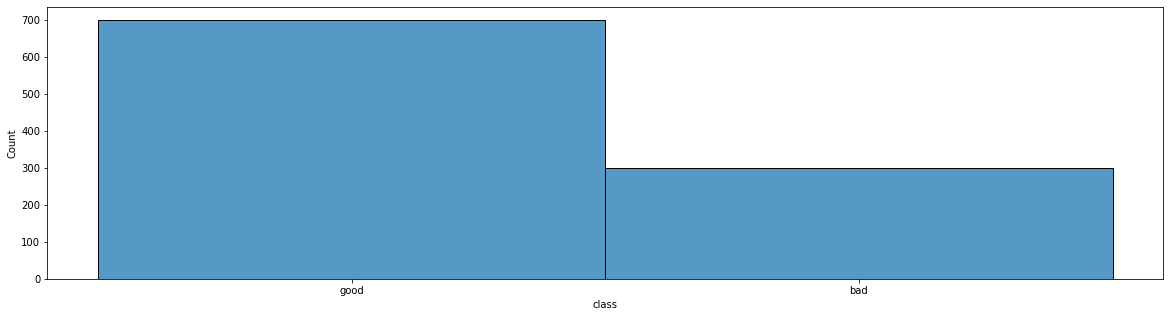

In [43]:
# Target variable

plt.figure(figsize=(20,5))
sns.histplot(y['class'])
plt.show()

*** Findings ***

70% of the customers were good credit customers and 30% were bad. 70% good is our baseline for the analysis

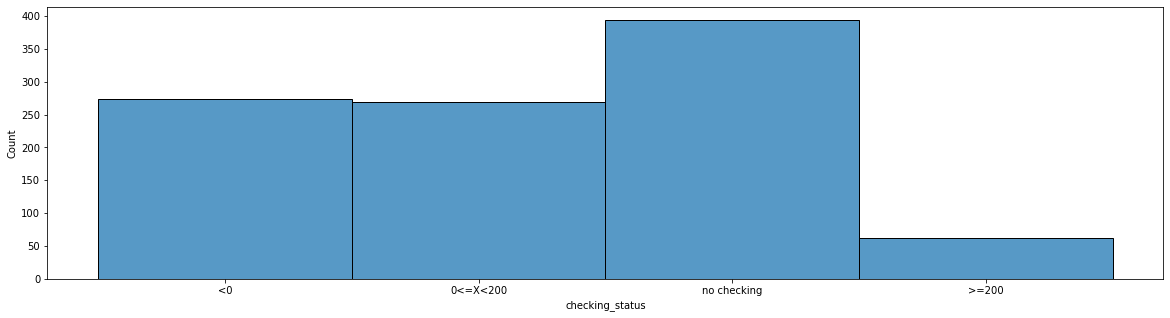

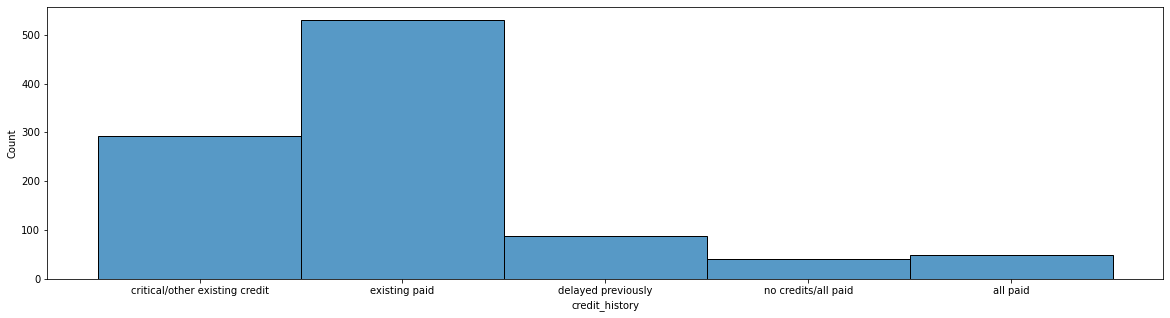

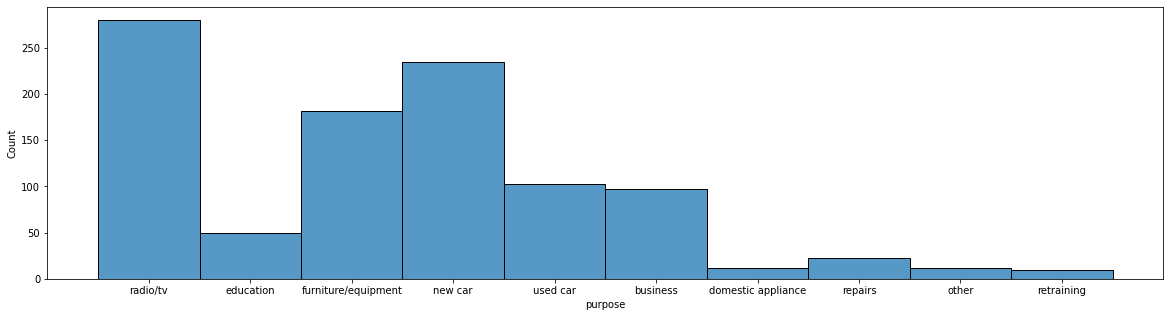

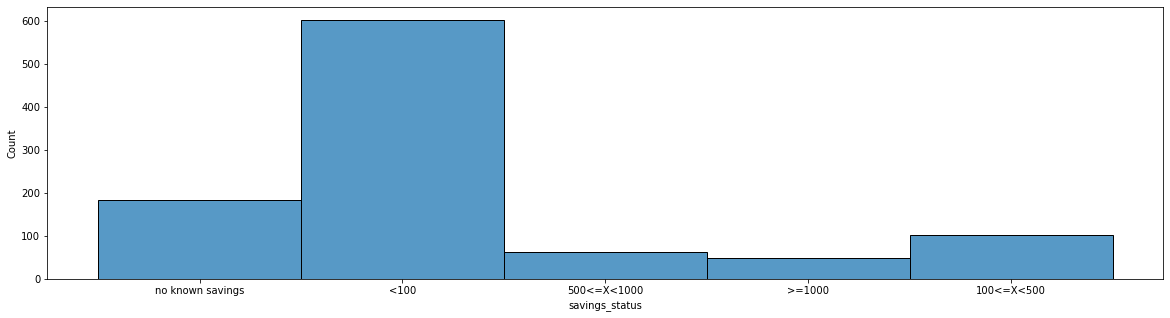

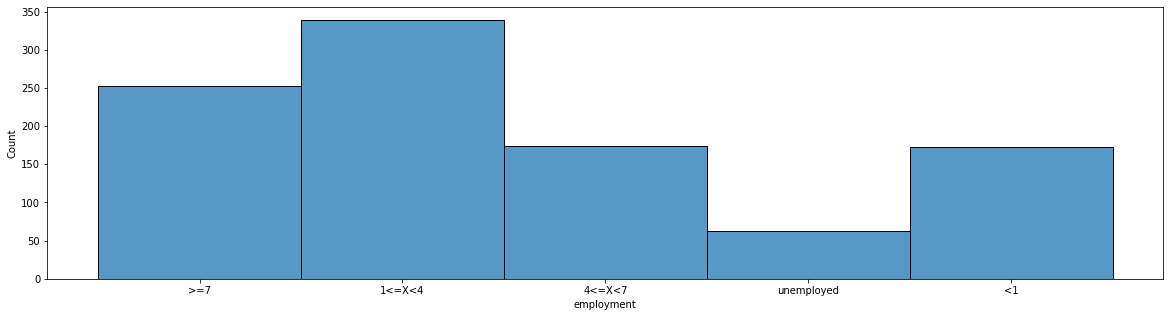

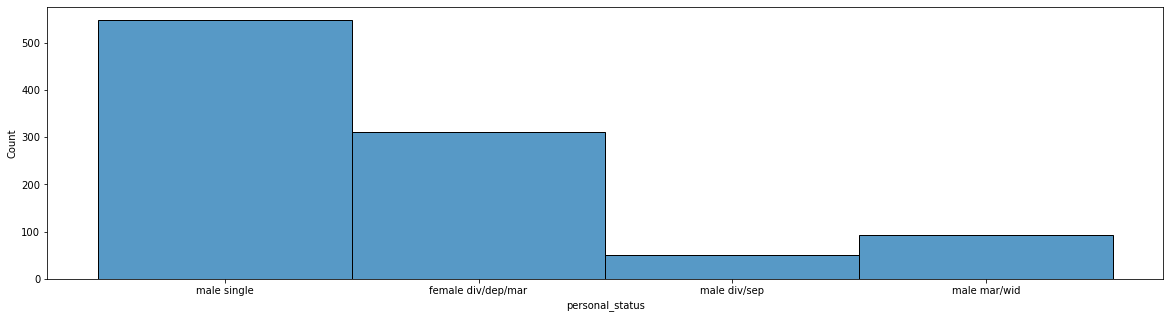

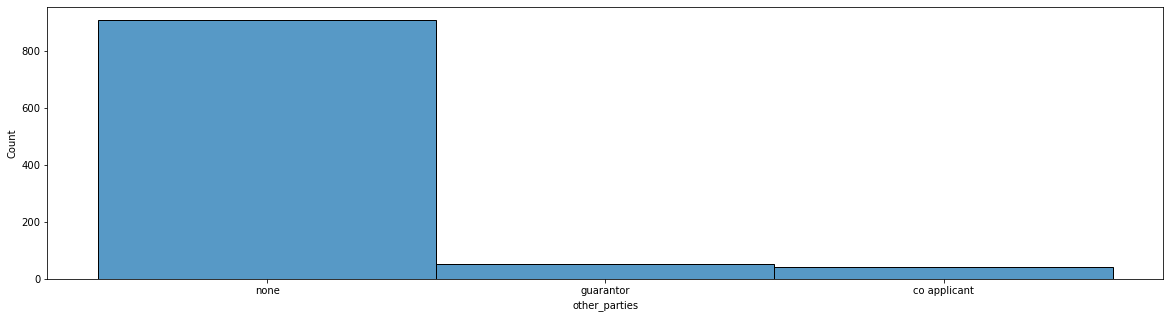

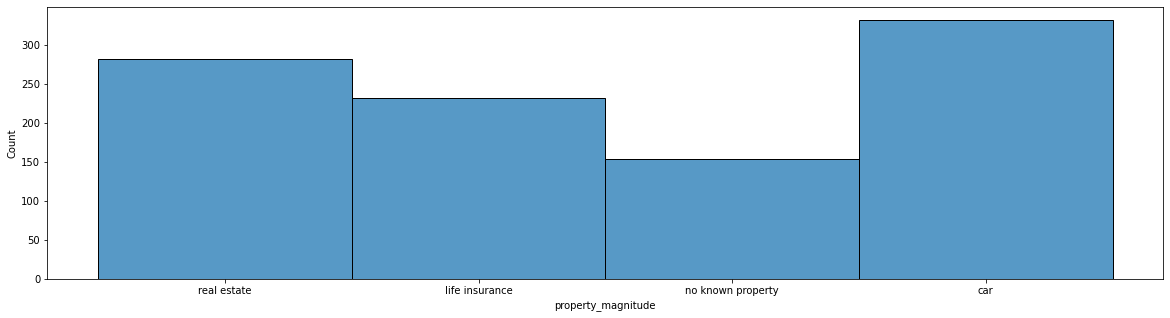

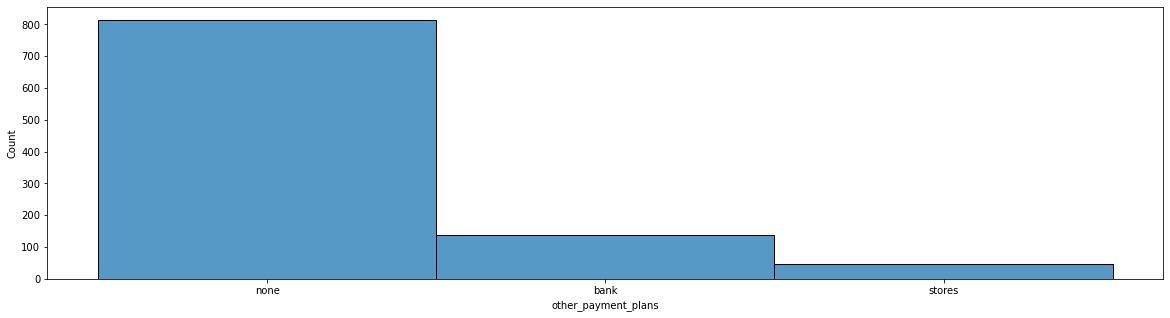

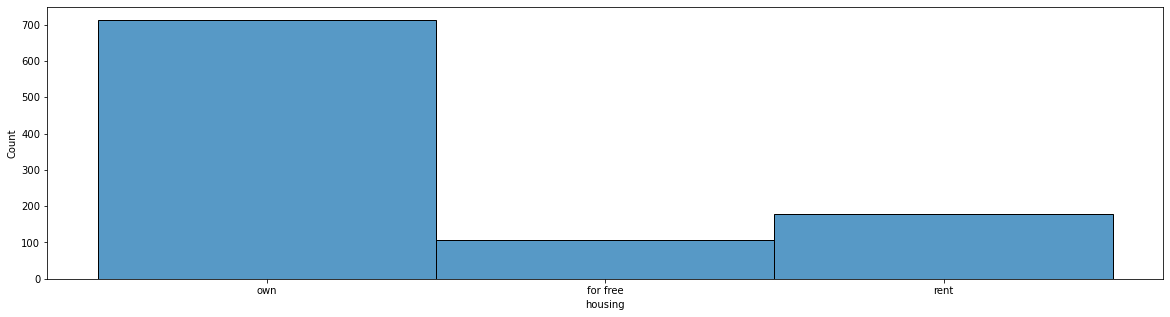

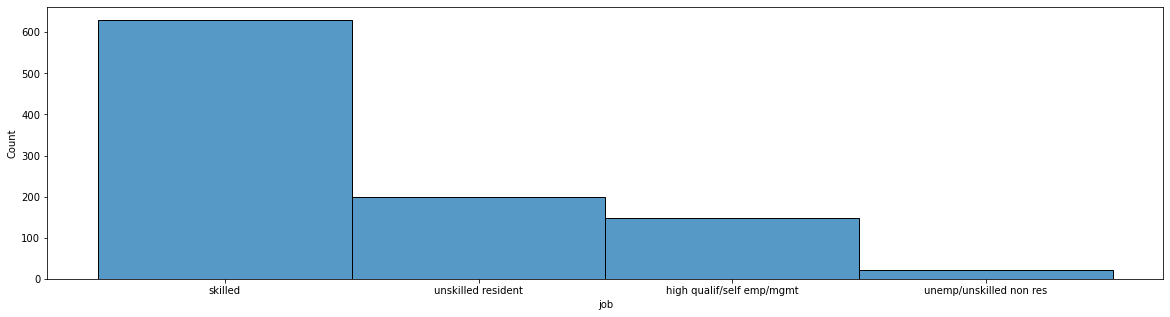

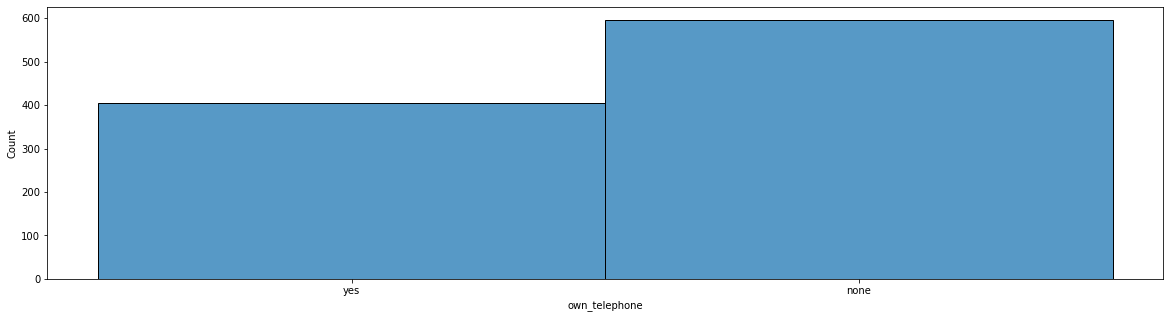

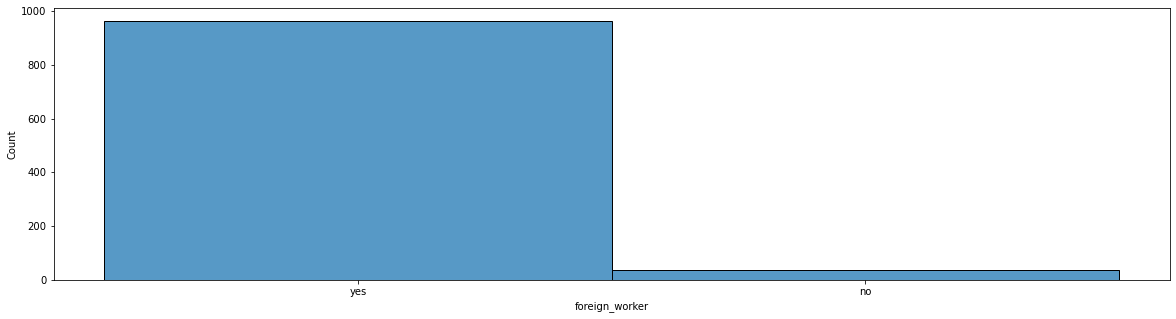

In [40]:
for cat in cat_features:
    plt.figure(figsize=(20,5))
    sns.histplot(X[cat])
    plt.show()

    

** Findings **

* Checking Status: Most customerrs have no checking, or their checking status is under 200

* Credit history: Based on the data it seems like most customers have existing credit and payed it, while, critical/other exisitinng, is the the next biggest category. no/credits/all paid, and all paid, may be candidates for combining into one category

* Purpose : customer are mainly getting credit cards for a new radio/tv, furniturre and cars

*  saving_status: most customerrs have less than 100 or no known savings

* employment status: Most of the customerrs have been employed between for more than 1 year at their current job

* personal Status: This may require some cleaning, as male is broken up into single vs div/sep or married, and female has all the categories except single in one bucket. May change this to gender depending on what it looks like when viewing the target variable with it

* Other parties: almost all none. May combine the two small buckets into one bucket

* Property magnitude: Mainly carrs, real estate, or life insurance

* other payment plans: mostlu none, may combine bank and stores into 'other'

* housing: most of the customers own their own house

* job: most are skilled labor

* own_telephone: over half have no phone

* foreign worker: The vast majority of the customers are foreign workers, which may explain some of their behaviors such as lack of phones




## Categorical Feature Analysis - Bivariate

Lets now understand how each of the categorical features interacts with the target variable

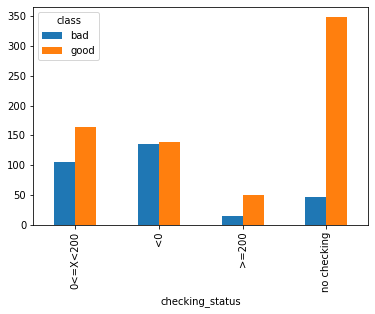

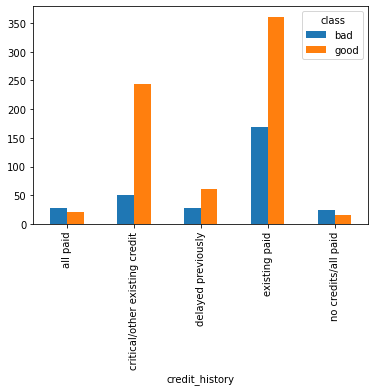

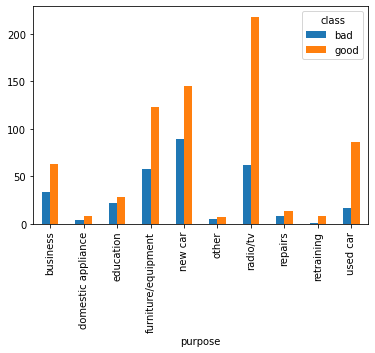

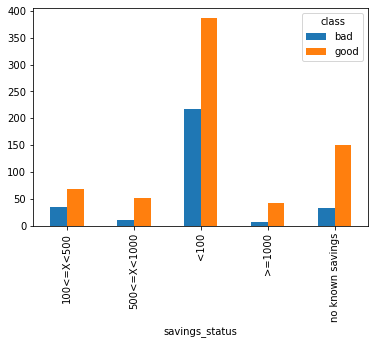

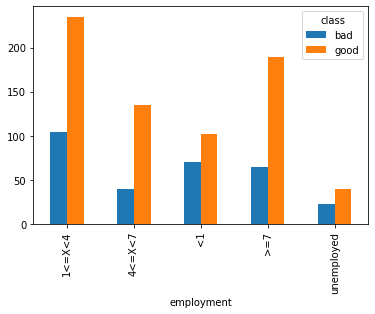

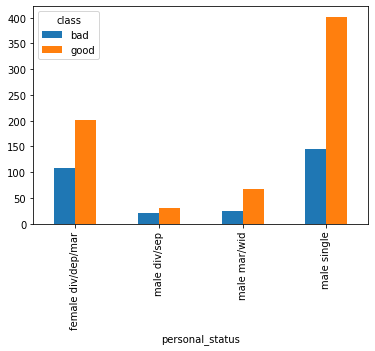

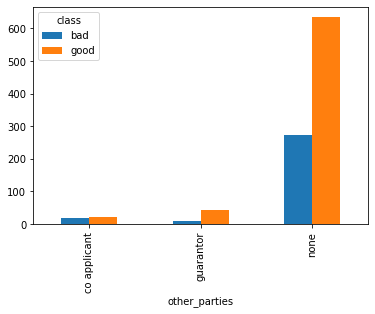

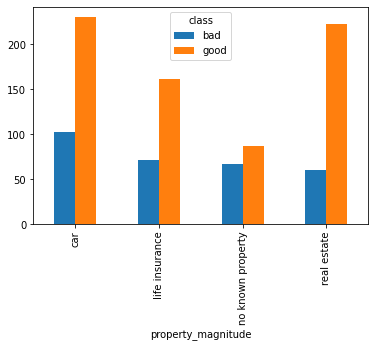

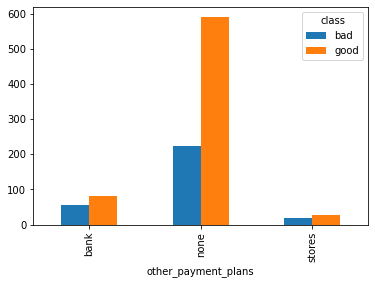

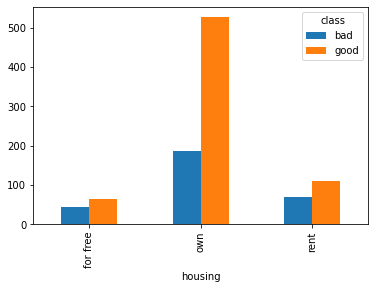

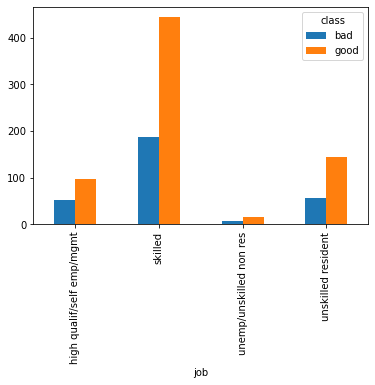

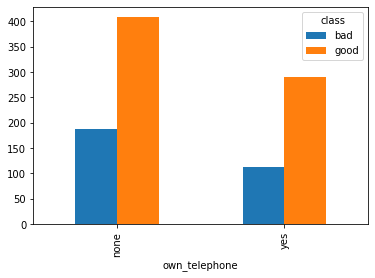

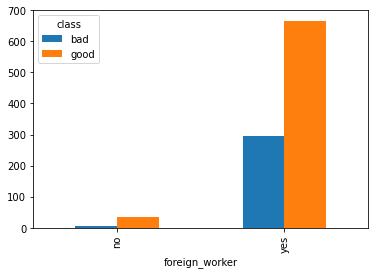

In [48]:
for cat in cat_features:
    plt.figure(figsize = ())
    pd.crosstab(X[cat], y['class']).plot(kind='bar')
    plt.show()